# Importing Libraries 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import poisson,binom,expon,norm

# Loading DataSet

In [2]:
df = pd.read_csv('aerofit_treadmill.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Checking Shape of data
# DataSet has 180 rows and 9 columns

In [3]:
df.shape

(180, 9)

# Checking DataType and Other info in Columns 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Statistical Summary summary of Columns Containing numarical values

In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Checking for missing values 
# Dataset has no missing value

In [6]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Heapmap below is showcasing correlation between columns values near 0 means weak correlation while near 1 or 1 means strong

<AxesSubplot:>

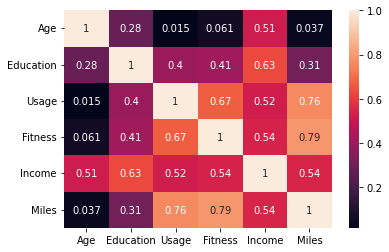

In [7]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [8]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

# People of age between 22-26 are more likly to use treadmill

<AxesSubplot:xlabel='Age', ylabel='Count'>

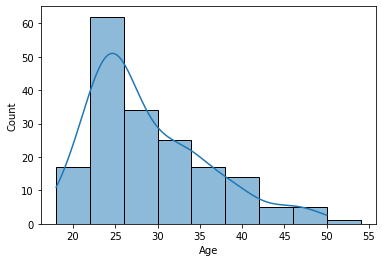

In [10]:
sns.histplot(x='Age',bins = [18,22,26,30,34,38,42,46,50,54],kde = True,data=df)

# Count of Single and Partnered Male and Female

<AxesSubplot:xlabel='Gender', ylabel='count'>

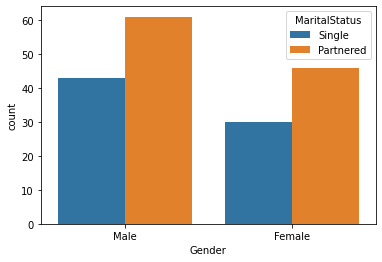

In [11]:
sns.countplot(x='Gender',hue='MaritalStatus',data=df)

# Checking for outliers in Miles
# Miles has 8 outliers

<AxesSubplot:xlabel='Miles'>

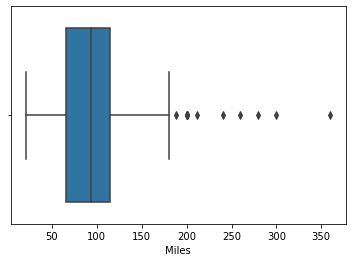

In [12]:
sns.boxplot(x='Miles',data = df)

# Checking for outliers in Miles
# Miles has 11 outliers

<AxesSubplot:xlabel='Income'>

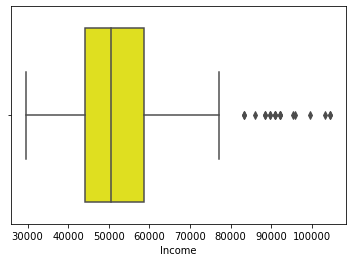

In [13]:
sns.boxplot(x='Income',color = 'yellow',data = df)

# Popularity of Various Product among male and female
# insight: KP781 is least popuar among female and KP281 is equally liked by both male and female

<AxesSubplot:xlabel='Product', ylabel='count'>

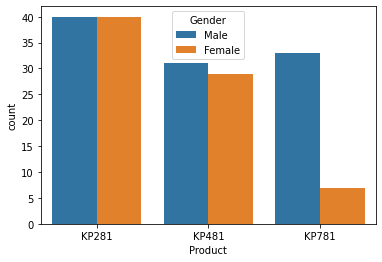

In [14]:
sns.countplot(x='Product',hue='Gender',data=df)

# Probability of Males and Females buying each product 
# Insight: Females are unlikly to buy product KP781

In [15]:
# Probability of Males and Females buying each product 
# Males & Female buying KP281 

P_281 = df.loc[df['Product']=='KP281']
M_281 = P_281[P_281['Gender']=='Male']
F_281 = P_281[P_281['Gender']=='Female']
print('Probability of Male buying KP281 treadmill is ',round(len(M_281)/len(P_281),2))
print('Probability of Female buying KP281 treadmill is ',round(len(F_281)/len(P_281),2))
print()
P_481 = df.loc[df['Product']=='KP481']
M_481 = P_481[P_481['Gender']=='Male']
F_481 = P_481[P_481['Gender']=='Female']
print('Probability of Male buying KP481 treadmill is ',round(len(M_481)/len(P_481),2))
print('Probability of Female buying KP481 treadmill is ',round(len(F_481)/len(P_481),2))
print()
P_781 = df.loc[df['Product']=='KP781']
M_781 = P_781[P_781['Gender']=='Male']
F_781 = P_781[P_781['Gender']=='Female']
print('Probability of Male buying KP781 treadmill is ',round(len(M_781)/len(P_781),2))
print('Probability of Female buying KP781 treadmill is ',round(len(F_781)/len(P_781),2))

Probability of Male buying KP281 treadmill is  0.5
Probability of Female buying KP281 treadmill is  0.5

Probability of Male buying KP481 treadmill is  0.52
Probability of Female buying KP481 treadmill is  0.48

Probability of Male buying KP781 treadmill is  0.82
Probability of Female buying KP781 treadmill is  0.17


# Popularity of Various Product among Single and Partnered
# Insights Partnered people are more inclined towards buying Treadmill 

<AxesSubplot:xlabel='Product', ylabel='count'>

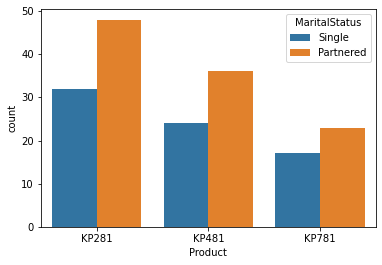

In [16]:
sns.countplot(x='Product',hue='MaritalStatus',data=df)

# Partnered People are more inclined towards buying Treadmill 

In [63]:
# Probability of Single and Partnered buying each product 
# Single & Partnered buying KP281 

PM_281 = df.loc[df['Product']=='KP281']
S_281 = PM_281[PM_281['MaritalStatus']=='Single']
P_281 = PM_281[PM_281['MaritalStatus']=='Partnered']
print('Probability of Single buying KP281 treadmill is ',round(len(S_281)/len(PM_281),2))
print('Probability of Partnered buying KP281 treadmill is ',round(len(P_281)/len(PM_281),2))
print()
# Single & Partnered buying KP481
PM_481 = df.loc[df['Product']=='KP481']
S_481 = PM_481[PM_481['MaritalStatus']=='Single']
P_481 = PM_481[PM_481['MaritalStatus']=='Partnered']
print('Probability of Single buying KP481 treadmill is ',round(len(S_481)/len(PM_481),2))
print('Probability of Partnered buying KP481 treadmill is ',round(len(P_481)/len(PM_481),2))
print()
PM_781 = df.loc[df['Product']=='KP781']
S_781 = PM_781[PM_781['MaritalStatus']=='Single']
P_781 = PM_781[PM_781['MaritalStatus']=='Partnered']
print('Probability of Single buying KP781 treadmill is ',round(len(S_781)/len(PM_781),2))
print('Probability of Partnered buying KP781 treadmill is ',round(len(P_781)/len(PM_781),2))

Probability of Single buying KP281 treadmill is  0.4
Probability of Partnered buying KP281 treadmill is  0.6

Probability of Single buying KP481 treadmill is  0.4
Probability of Partnered buying KP481 treadmill is  0.6

Probability of Single buying KP781 treadmill is  0.42
Probability of Partnered buying KP781 treadmill is  0.57


# Distribution of count of people based on Income 

<AxesSubplot:xlabel='Income', ylabel='Count'>

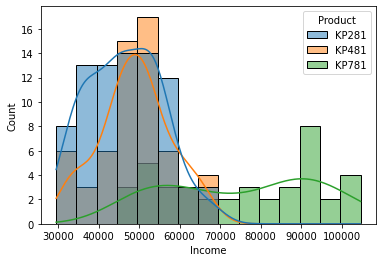

In [146]:
sns.histplot(x='Income',bins=15,hue='Product',kde=True,data=df)

# Probability of people buying a product based on their income 
# Insights: People with lower income are more likly to buy KP281 while people                      with higher income are more likly to buy KP781

In [64]:
mid_income = df.loc[((df['Income']>=30000)& (df['Income']<=60000)),:]
M_281 = mid_income[mid_income['Product']=='KP281']
M_481 = mid_income[mid_income['Product']=='KP481']
M_781 = mid_income[mid_income['Product']=='KP781']
print('Probability of people having salary b/w 30k and 60k and buying Treadmill KP281 is ',round(len(M_281)/len(mid_income),2))
print('Probability of people having salary b/w 30k and 60k and buying Treadmill KP481 is ',round(len(M_481)/len(mid_income),2))
print('Probability of people having salary b/w 30k and 60k and buying Treadmill KP781 is ',round(len(M_781)/len(mid_income),2))
print()
good_income = df.loc[((df['Income']>=60000)& (df['Income']<=90000)),:]
G_281 = good_income[good_income['Product']=='KP281']
G_481 = good_income[good_income['Product']=='KP481']
G_781 = good_income[good_income['Product']=='KP781']
print('Probability of people having salary b/w 60k and 90k and buying Treadmill KP281 is ',round(len(G_281)/len(good_income),2))
print('Probability of people having salary b/w 60k and 90k and buying Treadmill KP481 is ',round(len(G_481)/len(good_income),2))
print('Probability of people having salary b/w 60k and 90k and buying Treadmill KP781 is ',round(len(G_781)/len(good_income),2))
print()
high_income = df.loc[((df['Income']>=90000)& (df['Income']<=104581)),:]
H_281 = high_income[high_income['Product']=='KP281']
H_481 = high_income[high_income['Product']=='KP481']
H_781 = high_income[high_income['Product']=='KP781']
print('Probability of people having salary b/w 90k and 104k and buying Treadmill KP281 is ',round(len(H_281)/len(high_income),2))
print('Probability of people having salary b/w 90k and 104k and buying Treadmill KP481 is ',round(len(H_481)/len(high_income),2))
print('Probability of people having salary b/w 90k and 104k and buying Treadmill KP781 is ',round(len(H_781)/len(high_income),2))

Probability of people having salary b/w 30k and 60k and buying Treadmill KP281 is  0.53
Probability of people having salary b/w 30k and 60k and buying Treadmill KP481 is  0.39
Probability of people having salary b/w 30k and 60k and buying Treadmill KP781 is  0.08

Probability of people having salary b/w 60k and 90k and buying Treadmill KP281 is  0.2
Probability of people having salary b/w 60k and 90k and buying Treadmill KP481 is  0.23
Probability of people having salary b/w 60k and 90k and buying Treadmill KP781 is  0.57

Probability of people having salary b/w 90k and 104k and buying Treadmill KP281 is  0.0
Probability of people having salary b/w 90k and 104k and buying Treadmill KP481 is  0.0
Probability of people having salary b/w 90k and 104k and buying Treadmill KP781 is  1.0


# Distribution of People based on Fitness rating where 1 is low and 5 is highly Fit
# insight People having Fitness of 4-5 have higher probability of buying KP781 

<AxesSubplot:xlabel='Fitness', ylabel='count'>

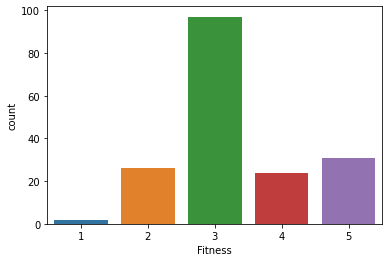

In [21]:
sns.countplot(x='Fitness',data=df)

In [33]:
F_3 = df[df['Fitness']==3]
F_K281 = F_3[F_3['Product']=='KP281']
print('Probability of Person using KP281 given that person is Fit is ', round(len(F_K281)/len(F_3),2))
F_K481 = F_3[F_3['Product']=='KP481']
print('Probability of Person using KP481 given that person is Fit is ', round(len(F_K481)/len(F_3),2))
F_K781 = F_3[F_3['Product']=='KP781']
print('Probability of Person using KP781 given that person is Fit is ', round(len(F_K781)/len(F_3),2))
print()
F_4_5 = df[(df['Fitness']==4)|(df['Fitness']==5)]
F_p281 = F_4_5[F_4_5['Product']=='KP281']
print('Probability of Person using KP281 given that person is Fit is ', round(len(F_p281)/len(F_4_5),2))
F_p481 = F_4_5[F_4_5['Product']=='KP481']
print('Probability of Person using KP481 given that person is Fit is ', round(len(F_p481)/len(F_4_5),2))
F_p781 = F_4_5[F_4_5['Product']=='KP781']
print('Probability of Person using KP781 given that person is Fit is ', round(len(F_p781)/len(F_4_5),2))


Probability of Person using KP281 given that person is Fit is  0.56
Probability of Person using KP481 given that person is Fit is  0.4
Probability of Person using KP781 given that person is Fit is  0.04

Probability of Person using KP281 given that person is Fit is  0.2
Probability of Person using KP481 given that person is Fit is  0.15
Probability of Person using KP781 given that person is Fit is  0.65


# Probability of People buying trademill based on their fitness 
# insights: People having higher fitness have more probability of buying a                                          treadmill 

In [40]:
prob_1_2 = round(len(df[(df['Fitness']==1)|(df['Fitness']==2)])/len(df),2)
prob_3_5 = round(len(df[df['Fitness']>2])/len(df),2)
print('probability of person buying treadmill and having fitness below 2 is',prob_1_2)
print()
print('probability of person buying treadmill and having fitness above 2 is',prob_3_5)

probability of person buying treadmill and having fitness below 2 is 0.16

probability of person buying treadmill and having fitness above 2 is 0.84


# Distribution of people count based Usage 

<AxesSubplot:xlabel='Usage', ylabel='count'>

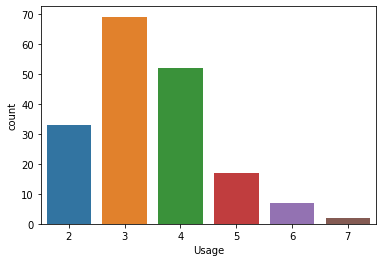

In [54]:
sns.countplot(x='Usage',data=df)

# Insight People having high fitness and good habbit of using treadmill has higher probability of buyin KP781

In [62]:
U_F = df[(df['Usage']>3)&(df['Fitness']>3)]
U_781 = U_F[U_F['Product']=='KP781']
print('Probability of People buying KP781 having fitness 4-5 and usage habit of more than 3 days is ',round(len(U_781)/len(U_F),2))

Probability of People buying KP781 having fitness 4-5 and usage habit of more than 3 days is  0.8


# Reccomendations
# 1. KP781 is a premium Product so aerofit should target high income and more motivation towards fitness 
# 2. People aging b/w 20-26 are more likly to buy treadmill so aerofit can target them
# 3. Married people are more inclined towards fitness so aerofit should target them more and more
# 4. there are more number of customer from lower to mid income group and they like to buy KP281 and there are more number of people whose fitness level is not too high and people from both these category likes to buy KP281 so aerofit must maintain good stock of KP281 as there is high probability of people wanting this over other treadmill
# 5. People with Salary more than 90000 do not like to buy any other treadmill except KP781 so we can reach one to one as their numbers are very less 
